In [1]:
from barrier3d import Barrier3d
from matplotlib import pyplot as plt
from cascade.outwasher import Outwasher
import numpy as np
import os
import copy

# Substep 20

In [17]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d._time_index)
    b3d.update()
    b3d.update_dune_domain()
outwash = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d._TMAX,
        berm_elev=b3d._BermEl,
        barrier_length=b3d._BarrierLength,
        sea_level=b3d._SL,
        bay_depth=-b3d._BayDepth,
        interior_domain=b3d.InteriorDomain,
        dune_domain=b3d.DuneDomain[b3d._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash.update(b3d)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

In [18]:
outwash._Qs_shoreface[b3d._time_index-1] # m^3

3870.3497280702186

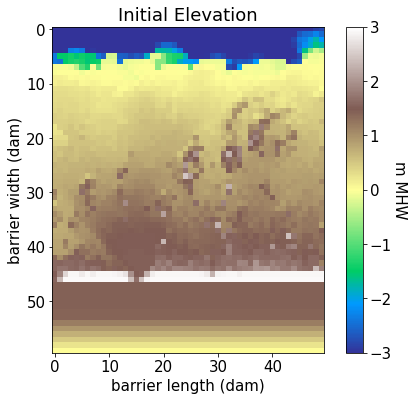

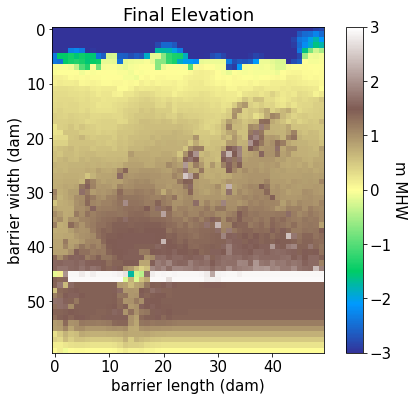

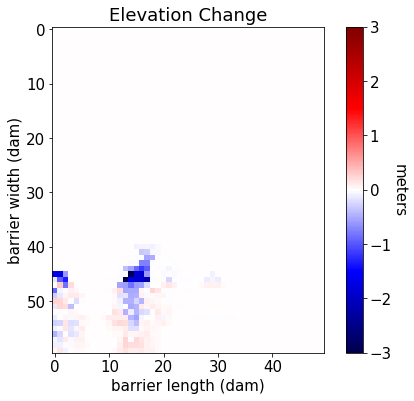

In [19]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Substep 60

In [5]:
b3d2 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d2._time_index)
    b3d2.update()
    b3d2.update_dune_domain()
outwash2 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d2._TMAX,
        berm_elev=b3d2._BermEl,
        barrier_length=b3d2._BarrierLength,
        sea_level=b3d2._SL,
        bay_depth=-b3d2._BayDepth,
        interior_domain=b3d2.InteriorDomain,
        dune_domain=b3d2.DuneDomain[b3d2._time_index - 1],
        block_size = 5,
        substep=60,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash2.update(b3d2)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

In [6]:
outwash2._Qs_shoreface[b3d2._time_index-1] # m^3

3499.8565458058065

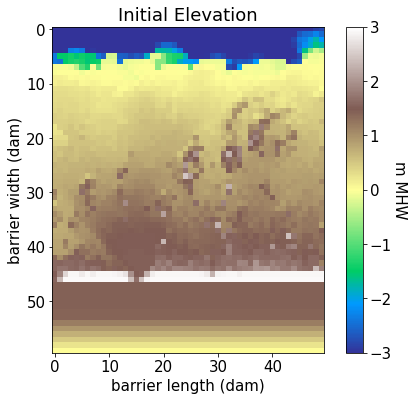

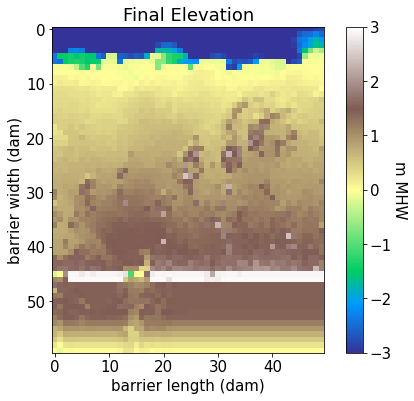

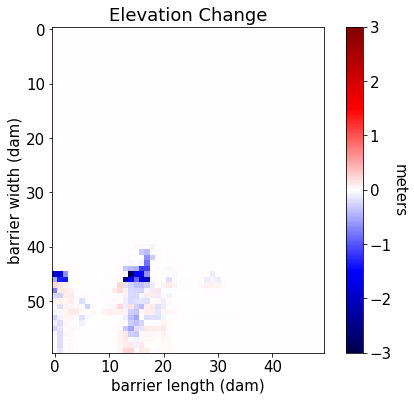

In [7]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash2._initial_full_domain
final_domain = outwash2._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Substep 120

In [8]:
b3d3 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d3._time_index)
    b3d3.update()
    b3d3.update_dune_domain()
outwash3 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d3._TMAX,
        berm_elev=b3d3._BermEl,
        barrier_length=b3d3._BarrierLength,
        sea_level=b3d3._SL,
        bay_depth=-b3d3._BayDepth,
        interior_domain=b3d3.InteriorDomain,
        dune_domain=b3d3.DuneDomain[b3d3._time_index - 1],
        block_size = 5,
        substep=120,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash3.update(b3d3)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822


In [9]:
outwash3._Qs_shoreface[b3d3._time_index-1] # m^3

3232.6376639508967

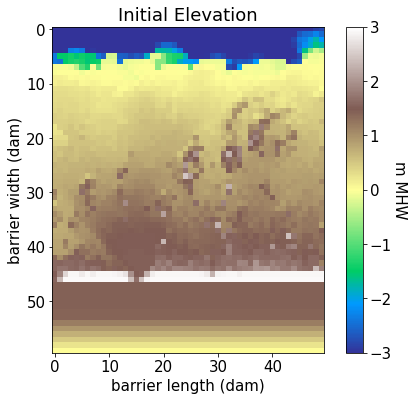

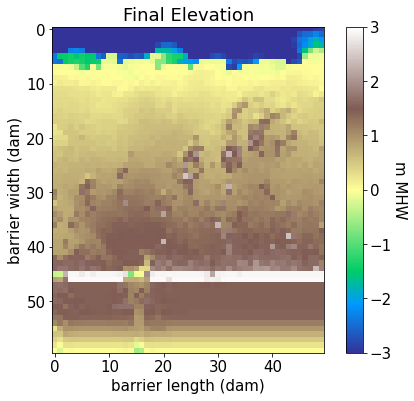

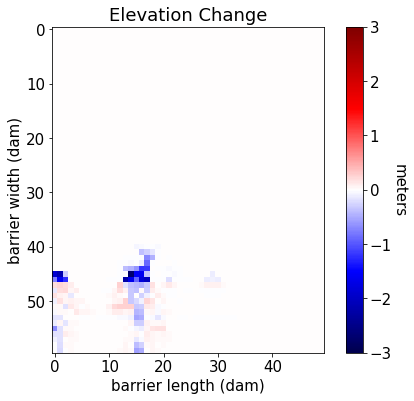

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash3._initial_full_domain
final_domain = outwash3._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Substep 600

In [11]:
b3d4 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d4._time_index)
    b3d4.update()
    b3d4.update_dune_domain()
outwash4 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d4._TMAX,
        berm_elev=b3d4._BermEl,
        barrier_length=b3d4._BarrierLength,
        sea_level=b3d4._SL,
        bay_depth=-b3d4._BayDepth,
        interior_domain=b3d4.InteriorDomain,
        dune_domain=b3d4.DuneDomain[b3d4._time_index - 1],
        block_size = 5,
        substep=600,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash4.update(b3d3)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822


3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461


4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100


6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740


8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379


9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015

11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
1138

12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12651
12652
12653
12654
12655
12656
12657
12658
12659
12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12698
12699
12700
12701
12702
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
1274

13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
1411

In [12]:
outwash4._Qs_shoreface[b3d3._time_index-1] # m^3

2933.356357859703

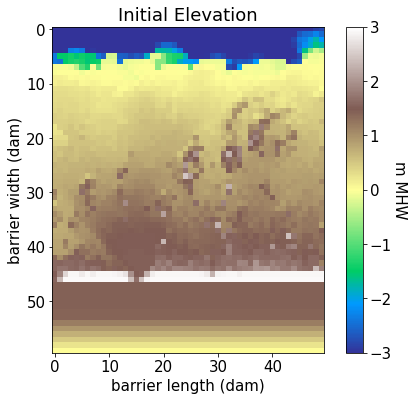

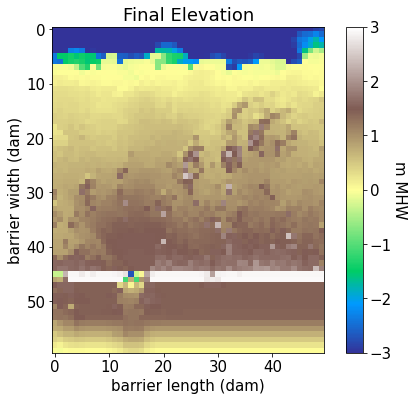

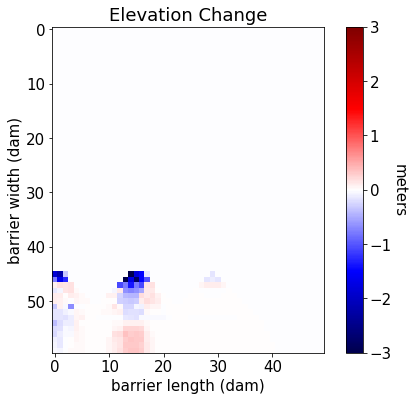

In [13]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash4._initial_full_domain
final_domain = outwash4._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)